### Import the libraries

In [1]:
import numpy as np
import pandas as pd        
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats 

/var/folders/zy/_h1xy46d69jg35qmf_0x_vnw0000gn/T/ipykernel_70643/2736211122.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Read the dataset 

In [2]:
df = pd.read_csv('train_data.csv')
df.head()

Index  Bankrupt?   ROA(C) before interest and depreciation before interest  \
0      0          0                                           0.450397          
1      1          0                                           0.530005          
2      2          0                                           0.571150          
3      3          0                                           0.483401          
4      4          0                                           0.510359          

    ROA(A) before interest and % after tax  \
0                                 0.504034   
1                                 0.572885   
2                                 0.620148   
3                                 0.556694   
4                                 0.537287   

    ROA(B) before interest and depreciation after tax  \
0                                           0.506986    
1                                           0.574763    
2                                           0.624177    
3                                           0.536164    
4                                           0.552546    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.594640                      0.594640   
1                 0.605695                      0.605558   
2                 0.612275                      0.612282   
3                 0.602445                      0.602445   
4                 0.600023                      0.600023   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998906                    0.797293   
1                0.999058                    0.797512   
2                0.999163                    0.797654   
3                0.999035                    0.797458   
4                0.999009                    0.797406   

    After-tax net Interest Rate  ...   Net Income to Total Assets  \
0                      0.809239  ...                     0.780554   
1                      0.809399  ...                     0.819963   
2                      0.809533  ...                     0.839128   
3                      0.809380  ...                     0.806477   
4                      0.809313  ...                     0.799277   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    0.004919             0.623634                0.594641   
1                    0.005968             0.624171                0.605690   
2                    0.006022             0.625306                0.612271   
3                    0.002177             0.621610                0.602444   
4                    0.001124             0.623993                0.600019   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.838869              0.279036   
1                             0.841869              0.279040   
2                             0.843294              0.278927   
3                             0.841891              0.293391   
4                             0.840313              0.279878   

    Degree of Financial Leverage (DFL)  \
0                             0.026788   
1                             0.026801   
2                             0.026816   
3                             0.027063   
4                             0.026880   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.565144                   1   
1                                           0.565205                   1   
2                                           0.565276                   1   
3                                           0.566190                   1   
4                                           0.565549                   1   

    Equity to Liability  
0              0.032464  
1              0.032442  
2              0.033034  
3              0.015406  
4              0.028858  

[5 rows x 97 columns]

In [3]:
df.describe()

Index    Bankrupt?  \
count  5807.000000  5807.000000   
mean   2903.000000     0.034097   
std    1676.480838     0.181493   
min       0.000000     0.000000   
25%    1451.500000     0.000000   
50%    2903.000000     0.000000   
75%    4354.500000     0.000000   
max    5806.000000     1.000000   

        ROA(C) before interest and depreciation before interest  \
count                                        5807.000000          
mean                                            0.505416          
std                                             0.060808          
min                                             0.000000          
25%                                             0.476673          
50%                                             0.503096          
75%                                             0.535417          
max                                             1.000000          

        ROA(A) before interest and % after tax  \
count                              5807.000000   
mean                                  0.558893   
std                                   0.065650   
min                                   0.000000   
25%                                   0.535679   
50%                                   0.559911   
75%                                   0.589212   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        5807.000000    
mean                                            0.553852    
std                                             0.061613    
min                                             0.000000    
25%                                             0.527437    
50%                                             0.552492    
75%                                             0.583998    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              5807.000000                   5807.000000   
mean                  0.607958                      0.607938   
std                   0.017499                      0.017480   
min                   0.000000                      0.000000   
25%                   0.600448                      0.600427   
50%                   0.605969                      0.605933   
75%                   0.613856                      0.613730   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             5807.000000                 5807.000000   
mean                 0.998726                    0.797192   
std                  0.014087                    0.013731   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999094                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  ...   Net Income to Total Assets  \
count                   5807.000000  ...                  5807.000000   
mean                       0.809081  ...                     0.807956   
std                        0.014553  ...                     0.039062   
min                        0.000000  ...                     0.224792   
25%                        0.809312  ...                     0.796843   
50%                        0.809376  ...                     0.810710   
75%                        0.809469  ...                     0.826544   
max                        1.000000  ...                     1.000000   

        Total assets to GNP price   No-credit Interval  \
count                5.807000e+03          5807.000000   
mean                 1.803513e+07             0.624030   
std                  3.706013e+08             0.009625   
min                  1.015560e-04             0.419045   
25%              

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5807 entries, 0 to 5806
Data columns (total 97 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Index                                                     5807 non-null   int64  
 1   Bankrupt?                                                 5807 non-null   int64  
 2    ROA(C) before interest and depreciation before interest  5807 non-null   float64
 3    ROA(A) before interest and % after tax                   5807 non-null   float64
 4    ROA(B) before interest and depreciation after tax        5807 non-null   float64
 5    Operating Gross Margin                                   5807 non-null   float64
 6    Realized Sales Gross Margin                              5807 non-null   float64
 7    Operating Profit Rate                                    5807 non-null   float64
 8    Pre-tax net Inter

### remove the index column 

In [5]:
df = df.drop(['Index'], axis=1)

In [6]:
df.shape

(5807, 96)

### Check the missing value

In [7]:
if df.isnull().values.any():
    print('Columns with missing values: ', df.columns[df.isnull().any()])
else :
    print('No missing values found')



No missing values found


### Split the data to X and Y 

In [8]:
X = df.drop(['Bankrupt?'], axis=1)
y = df['Bankrupt?']

### Check the features non-linearity 

In [9]:
# check non linearity wit spearman correlation and return the p-value and give me the number of columns that are non linear

def identify_non_linear_features(X, y, threshold):
    non_linear_features = []
    
    for column in X.columns:
        spearman_corr, p_value = stats.spearmanr(X[column], y)

        if abs(spearman_corr) < threshold:
            non_linear_features.append(column)

    return non_linear_features

non_linear_features = identify_non_linear_features(X,y,0.9)
print("Number of non linear features: ",len(non_linear_features))

#print the name of linear features 
linear_features = [x for x in X.columns if x not in non_linear_features]
print("Linear features: ",linear_features)




Number of non linear features:  94
Linear features:  [' Net Income Flag']


/var/folders/zy/_h1xy46d69jg35qmf_0x_vnw0000gn/T/ipykernel_70643/899966032.py:7: DeprecationWarning: Please import `spearmanr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  spearman_corr, p_value = stats.spearmanr(X[column], y)
/var/folders/zy/_h1xy46d69jg35qmf_0x_vnw0000gn/T/ipykernel_70643/899966032.py:7: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, p_value = stats.spearmanr(X[column], y)


In [10]:
X = X.drop(linear_features, axis=1)
X.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.450397         
1                                           0.530005         
2                                           0.571150         
3                                           0.483401         
4                                           0.510359         

   ROA(A) before interest and % after tax  \
0                                0.504034   
1                                0.572885   
2                                0.620148   
3                                0.556694   
4                                0.537287   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.506986                0.594640   
1                                           0.574763                0.605695   
2                                           0.624177                0.612275   
3                                           0.536164                0.602445   
4                                           0.552546                0.600023   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.594640               0.998906   
1                     0.605558               0.999058   
2                     0.612282               0.999163   
3                     0.602445               0.999035   
4                     0.600023               0.999009   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.797293                     0.809239   
1                   0.797512                     0.809399   
2                   0.797654                     0.809533   
3                   0.797458                     0.809380   
4                   0.797406                     0.809313   

   Non-industry income and expenditure/revenue  \
0                                     0.303489   
1                                     0.303553   
2                                     0.303582   
3                                     0.303506   
4                                     0.303468   

   Continuous interest rate (after tax)  ...  Liability-Assets Flag  \
0                              0.781491  ...                      0   
1                              0.781665  ...                      0   
2                              0.781813  ...                      0   
3                              0.781633  ...                      0   
4                              0.781614  ...                      0   

   Net Income to Total Assets  Total assets to GNP price  No-credit Interval  \
0                    0.780554                   0.004919            0.623634   
1                    0.819963                   0.005968            0.624171   
2                    0.839128                   0.006022            0.625306   
3                    0.806477                   0.002177            0.621610   
4                    0.799277                   0.001124            0.623993   

   Gross Profit to Sales  Net Income to Stockholder's Equity  \
0               0.594641                            0.838869   
1               0.605690                            0.841869   
2               0.612271                            0.843294   
3               0.602444                            0.841891   
4               0.600019                            0.840313   

   Liability to Equity  Degree of Financial Leverage (DFL)  \
0             0.279036                            0.026788   
1             0.279040                            0.026801   
2             0.278927                            0.026816   
3             0.293391                            0.027063   
4             0.279878                            0.026880   

   Interest Coverage Ratio (Interest expense to EBIT)  Equity to Liability  
0                                           0.565144              0.032464  
1                                           0.5

### Correlation Analysis

In [11]:
def remove_high_correlation_features(X, threshold):
    correlation = X.corr()
    upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop

high_correlation_features = remove_high_correlation_features(X, 0.95)
print("Number of high correlation features: ",len(high_correlation_features))




Number of high correlation features:  16


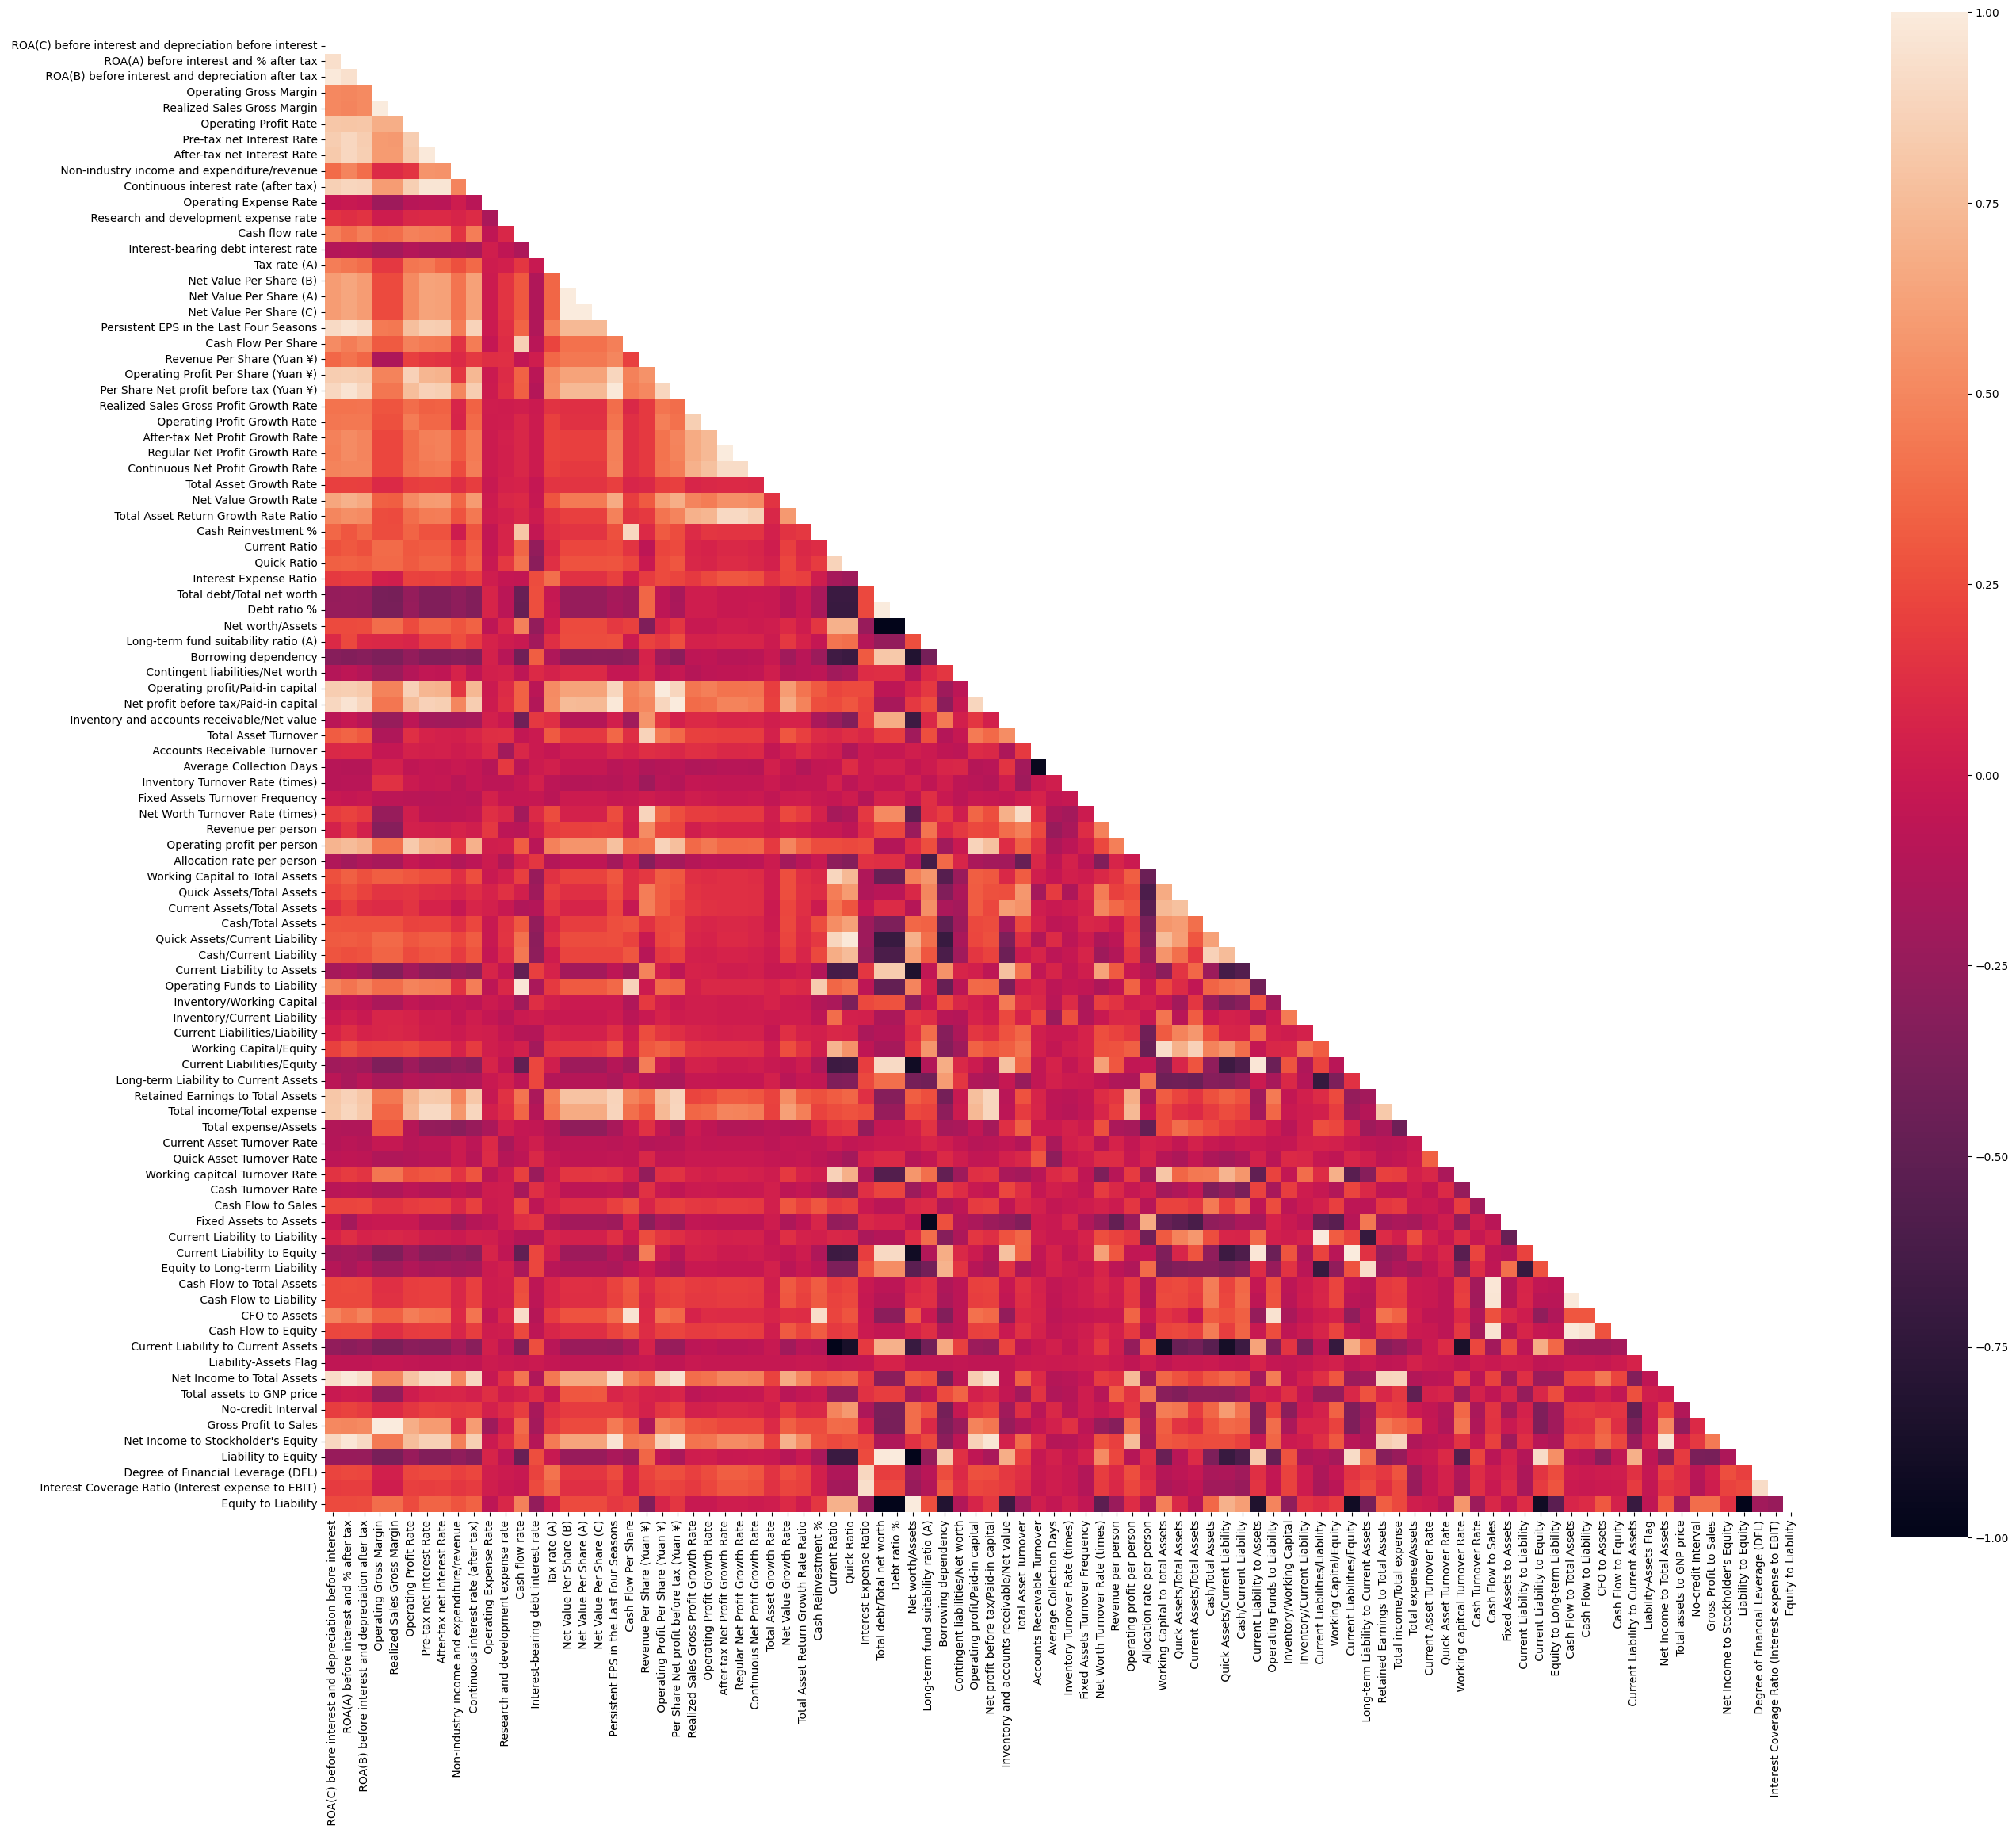

In [12]:
f, ax = plt.subplots(figsize=(30, 25))
correlation = X.corr('spearman')
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask= mask, vmax=1, square=True)
plt.show()

In [13]:
X = X.drop(high_correlation_features, axis=1)
X.shape

(5807, 78)

### Histogram of the Numerical data 

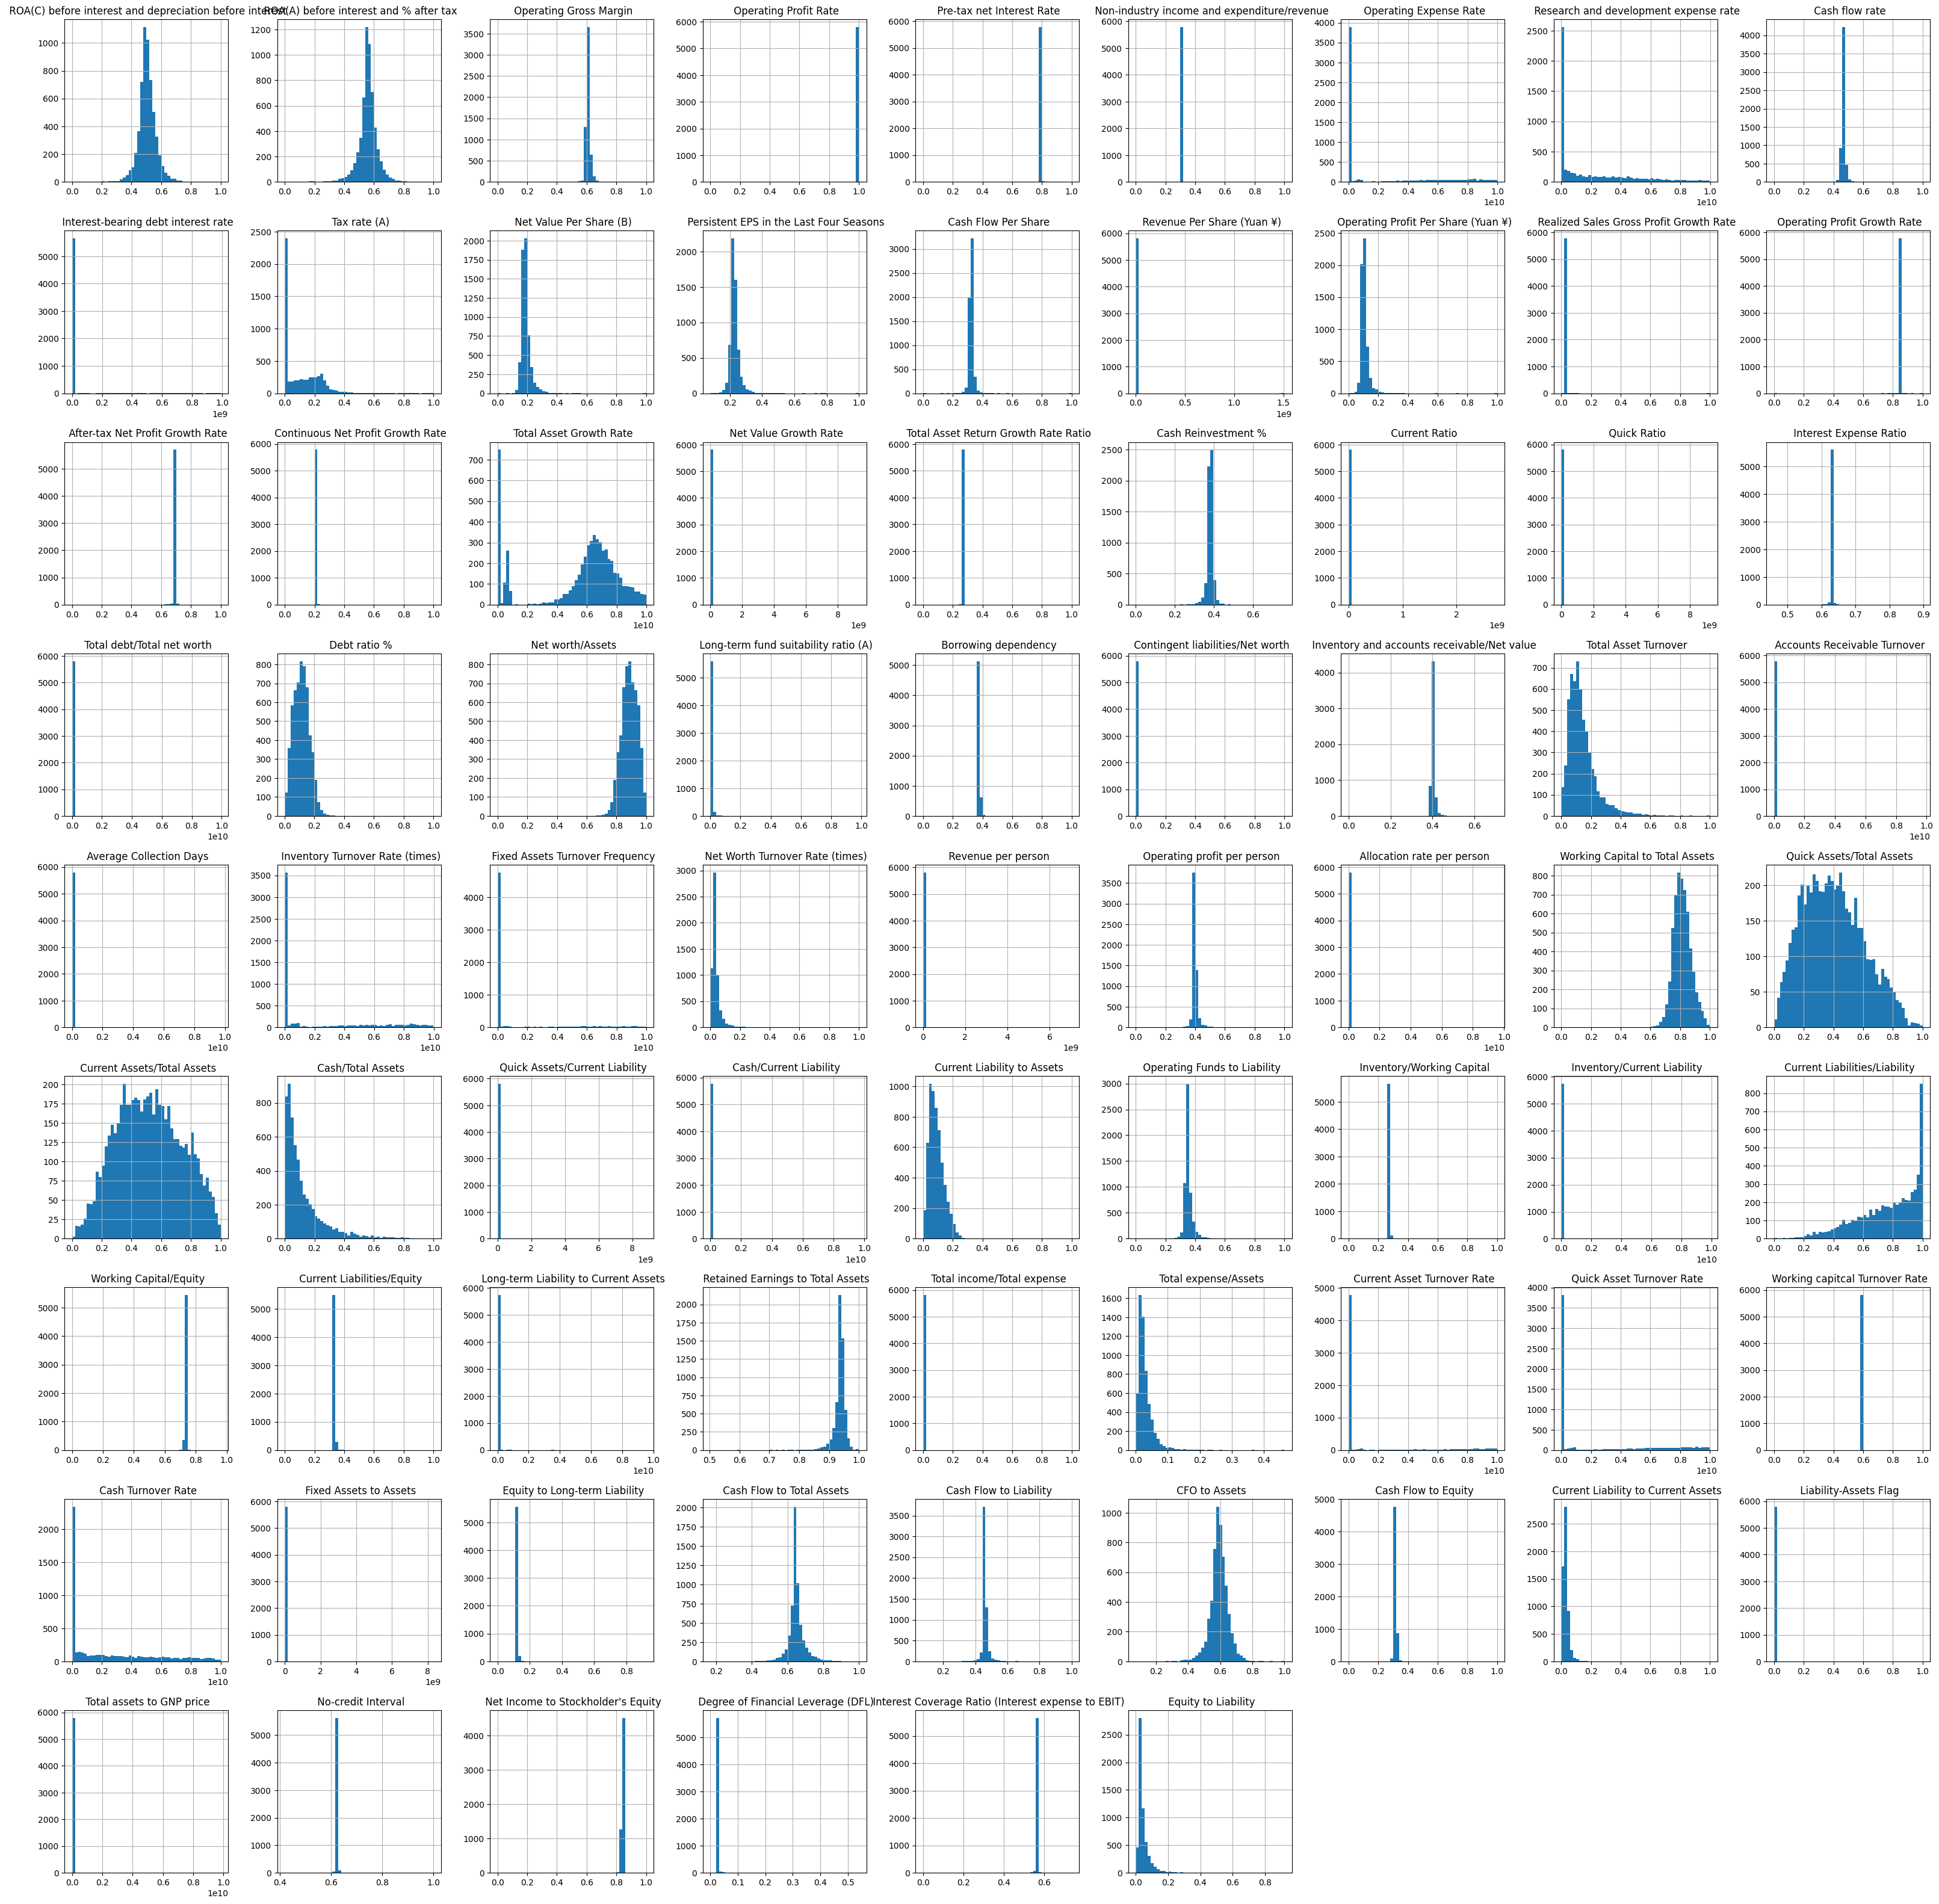

In [14]:
X.hist(bins=50, figsize=(40,40))
plt.show()


### Outlier capping 

In [15]:
def cap_outliers(X):
    for column in X.columns:
        Q1 = X[column].quantile(0.25)
        Q3 = X[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        X[column] = np.where(X[column] < lower_bound, lower_bound, X[column])
        X[column] = np.where(X[column] > upper_bound, upper_bound, X[column])
    return X

X = cap_outliers(X)


### Apply log transformation to make the data normal

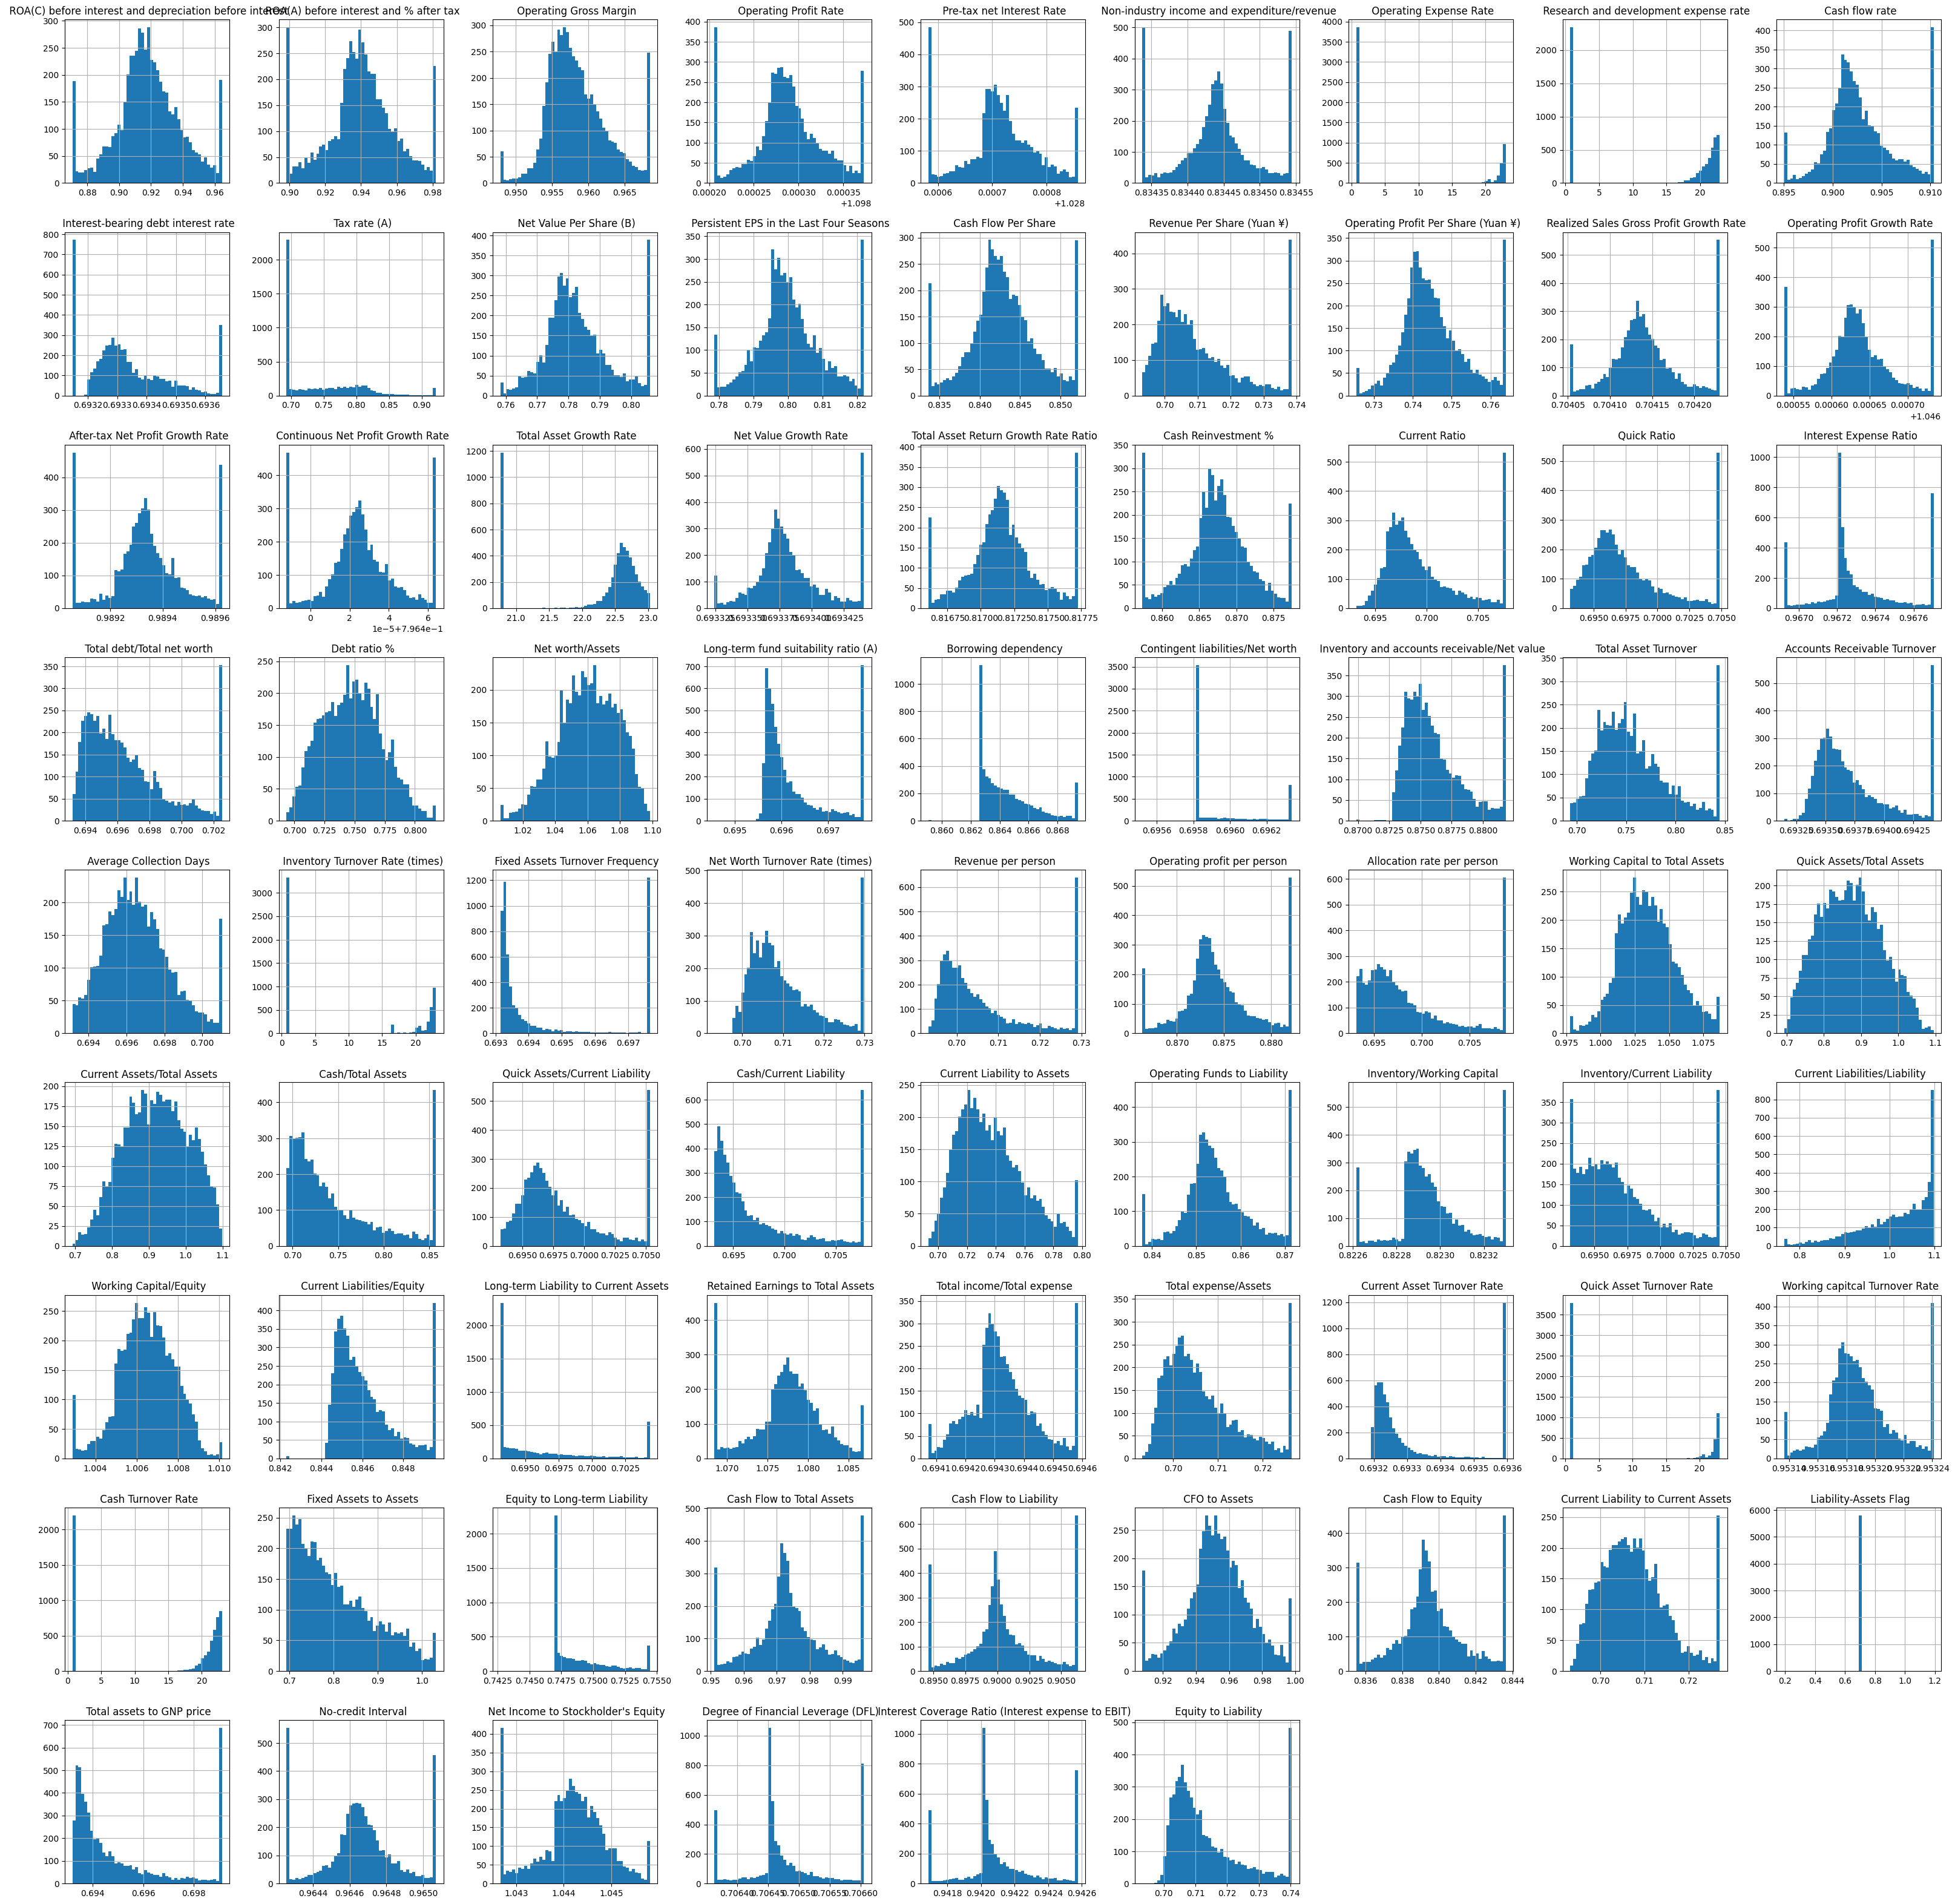

In [16]:
X = np.log1p(X+1)
X.hist(bins=50, figsize=(40,40))
plt.show()


In [17]:
non_linear_features = identify_non_linear_features(X,y,0.5)
print("Number of non linear features: ",len(non_linear_features))

Number of non linear features:  77


/var/folders/zy/_h1xy46d69jg35qmf_0x_vnw0000gn/T/ipykernel_70643/899966032.py:7: DeprecationWarning: Please import `spearmanr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  spearman_corr, p_value = stats.spearmanr(X[column], y)
/var/folders/zy/_h1xy46d69jg35qmf_0x_vnw0000gn/T/ipykernel_70643/899966032.py:7: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, p_value = stats.spearmanr(X[column], y)


In [18]:
#print the name of linear features 
linear_features = [x for x in X.columns if x not in non_linear_features]
print("Linear features: ",linear_features)

Linear features:  [' Liability-Assets Flag']


In [19]:
X = X.drop(linear_features, axis=1)
X.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.896250         
1                                           0.928221         
2                                           0.944353         
3                                           0.909629         
4                                           0.920426         

   ROA(A) before interest and % after tax  Operating Gross Margin  \
0                                0.917903                0.953448   
1                                0.945028                0.957699   
2                                0.963231                0.960221   
3                                0.938715                0.956451   
4                                0.931096                0.955520   

   Operating Profit Rate  Pre-tax net Interest Rate  \
0               1.098247                   1.028652   
1               1.098298                   1.028731   
2               1.098333                   1.028781   
3               1.098291                   1.028711   
4               1.098282                   1.028692   

   Non-industry income and expenditure/revenue  Operating Expense Rate  \
0                                     0.834425               22.803957   
1                                     0.834453                0.693198   
2                                     0.834465                0.693200   
3                                     0.834432               22.742161   
4                                     0.834416               22.559042   

   Research and development expense rate  Cash flow rate  \
0                               0.693147        0.901231   
1                              19.421313        0.902057   
2                              22.167829        0.905311   
3                               0.693147        0.897055   
4                              21.581927        0.901042   

   Interest-bearing debt interest rate  ...  Cash Flow to Liability  \
0                             0.693354  ...                0.901925   
1                             0.693217  ...                0.900899   
2                             0.693277  ...                0.904267   
3                             0.693281  ...                0.900400   
4                             0.693352  ...                0.897865   

   CFO to Assets  Cash Flow to Equity  Current Liability to Current Assets  \
0       0.944056             0.840755                             0.707996   
1       0.953720             0.839992                             0.705960   
2       0.967570             0.842418                             0.702369   
3       0.907608             0.840927                             0.710308   
4       0.945292             0.837444                             0.708779   

   Total assets to GNP price  No-credit Interval  \
0                   0.695604            0.964560   
1                   0.696127            0.964765   
2                   0.696154            0.965070   
3                   0.694235            0.964254   
4                   0.693709            0.964697   

   Net Income to Stockholder's Equity  Degree of Financial Leverage (DFL)  \
0                            1.043406                            0.706452   
1                            1.044462                            0.706459   
2                            1.044963                            0.706466   
3                            1.044470                            0.706588   
4                            1.043914                            0.706498   

   Interest Coverage Ratio (Interest expense to EBIT)  Equity to Liability  
0                                           0.942015              0.709249  
1                                           0.942038              0.709238  
2                                           0.942066              0.709529  
3                                           0.942422              0.700821  
4                    

In [20]:
def check_normality(X):
    normality = []
    for column in X.columns:
        _, p_value = stats.normaltest(X[column])
        if p_value < 0.05:
            normality.append(column)
    return normality

non_normal_features = check_normality(X)
print("Number of non normal features: ",len(non_normal_features))

Number of non normal features:  71


/var/folders/zy/_h1xy46d69jg35qmf_0x_vnw0000gn/T/ipykernel_70643/136652326.py:4: DeprecationWarning: Please import `normaltest` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, p_value = stats.normaltest(X[column])


In [21]:
from sklearn. preprocessing import StandardScaler  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Using LassoCV to find the best alpha and fit the model
lasso = LassoCV(cv=5, random_state=42, max_iter=10000)
lasso.fit(X_train, y_train)

# Coefficients from Lasso
coef = pd.Series(lasso.coef_, index = X.columns)

# Features selected by Lasso (coefficients not shrunk to zero)
selected_features = list(coef[coef != 0].index)
print("Selected features by Lasso:")
print(selected_features)

# Number of features selected
print(f"Number of features selected: {len(selected_features)}")


/Users/elia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021194283587377072, tolerance: 0.011371701015071855
  model = cd_fast.enet_coordinate_descent_gram(
/Users/elia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18281468385191602, tolerance: 0.011371701015071855
  model = cd_fast.enet_coordinate_descent_gram(
/Users/elia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019819835784375073, tolerance: 0.009504583205167349
  model = cd_fast.enet_coordinate_descent_gram(
/Users/elia/Library/Python/3.9/lib/pyt

Selected features by Lasso:
[' ROA(A) before interest and % after tax', ' Operating Gross Margin', ' Non-industry income and expenditure/revenue', ' Research and development expense rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Net worth/Assets', ' Long-term fund suitability ratio (A)', ' Borrowing dependency', ' Contingent liabilities/Net worth', ' Inventory and accounts receivable/Net value', ' Total Asset Turnover', ' Average Collection Days', ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency', ' Revenue per person', ' Operating profit per person', 

In [23]:
X_selected = X[selected_features]

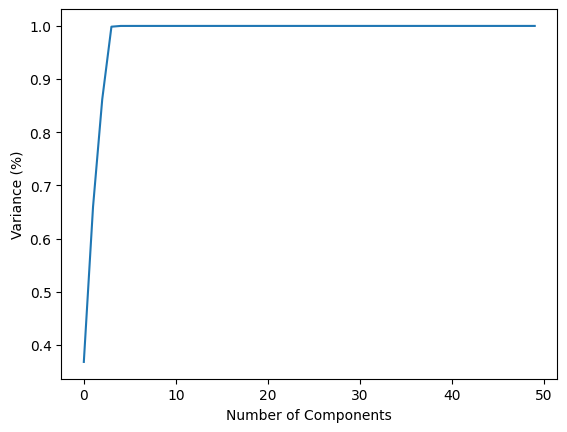

In [24]:
#apply pca with 50 components and get the explained variance ratio and draw a plot
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_selected)
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.show()

In [25]:
# get the number of components that explain 95% of the variance
n_components = np.argmax(np.cumsum(explained_variance) > 0.95)
print("Number of components: ",n_components)

Number of components:  3


In [26]:
# select the number of components that explain 95% of the variance
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(5807, 3)

In [27]:
X = pd.DataFrame(X_pca)
X.head()

0         1         2
0 -4.375514  2.879040  0.929206
1  1.068188 -1.562726 -0.116874
2  4.166077 -1.232482  1.721581
3 -4.125390 -6.582472 -2.383277
4 -0.816062 -2.599907 -3.025251

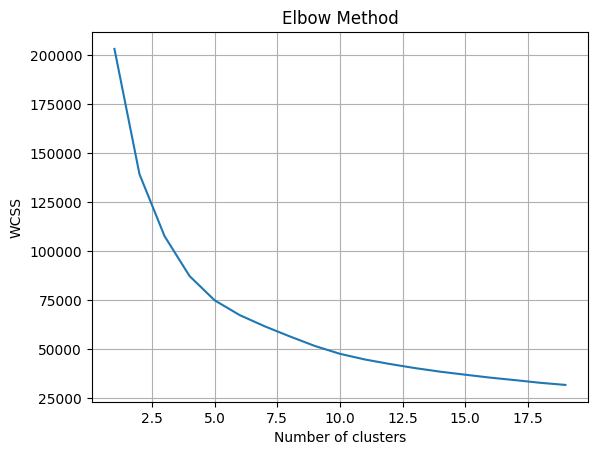

In [38]:
#apply kmeans with k in range 1 to 10 and draw the elbow plot
from sklearn.cluster import KMeans
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=100, random_state=123)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20), wcss)
plt.title('Elbow Method')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [40]:
# kmeans with 3 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=1000, n_init=100, random_state=123 )
kmeans.fit(X_pca)
clusters = kmeans.predict(X_pca)
X_pca_df = pd.DataFrame(X_pca, columns=[f'Component_{i}' for i in range(X_pca.shape[1])])
X_pca_df['Cluster'] = clusters

In [42]:
X_pca_df.head()

Component_0  Component_1  Component_2  Cluster
0    -4.375514     2.879040     0.929206        5
1     1.068188    -1.562726    -0.116874        2
2     4.166077    -1.232482     1.721581        2
3    -4.125390    -6.582472    -2.383277        0
4    -0.816062    -2.599907    -3.025251        0

In [43]:
df_new = pd.concat([X_pca_df, y], axis=1)
df_new.head()

Component_0  Component_1  Component_2  Cluster  Bankrupt?
0    -4.375514     2.879040     0.929206        5          0
1     1.068188    -1.562726    -0.116874        2          0
2     4.166077    -1.232482     1.721581        2          0
3    -4.125390    -6.582472    -2.383277        0          0
4    -0.816062    -2.599907    -3.025251        0          0

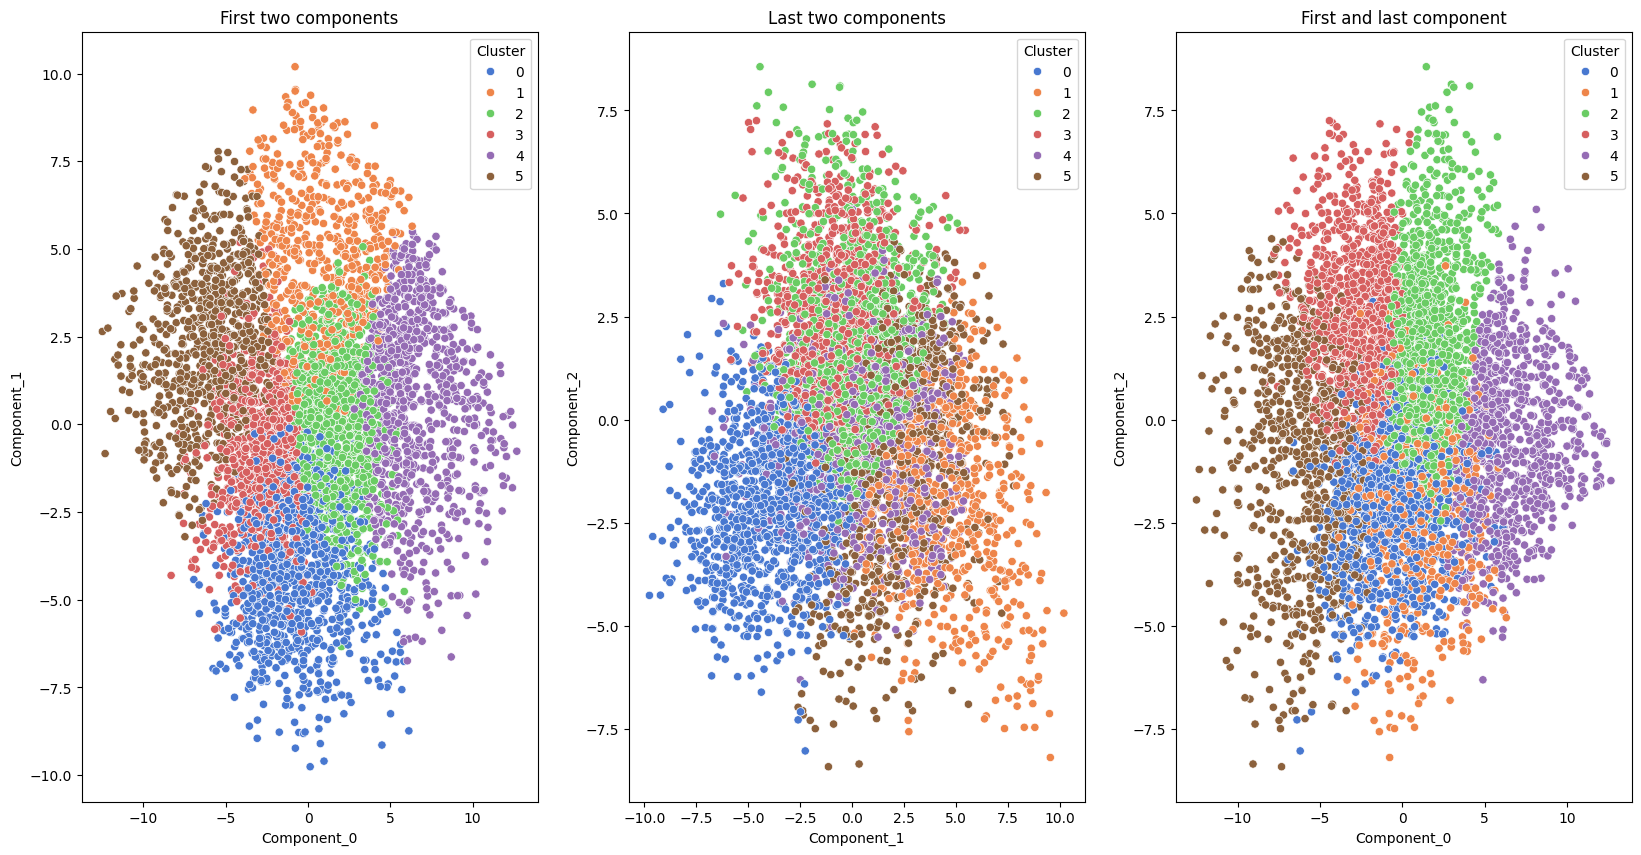

In [51]:
# plot the clusters with the first two components and the last two components and first and last component

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_new, x='Component_0', y='Component_1', hue='Cluster', palette='muted')
plt.title('First two components')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df_new, x='Component_1', y='Component_2', hue='Cluster', palette='muted')
plt.title('Last two components')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df_new, x='Component_0', y='Component_2', hue='Cluster', palette='muted')
plt.title('First and last component')

plt.show()


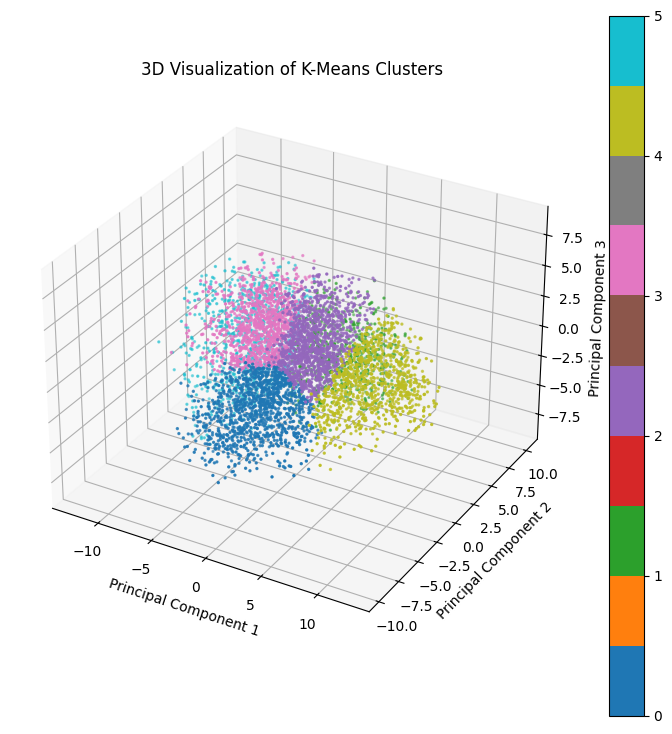

In [91]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(222, projection='3d')

scatter = ax.scatter(df_new['Component_0'], df_new['Component_1'], df_new['Component_2'], 
                     c=clusters, marker='o', s = 2,  cmap='tab10')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

ax.set_title('3D Visualization of K-Means Clusters')
plt.colorbar(scatter)
plt.show()


In [98]:
# get the describe of each cluster 
print('infromation : ' ,df_new.iloc[:,0:4].groupby('Cluster').describe())


infromation :          Component_0                                                     \
              count      mean       std        min       25%       50%   
Cluster                                                                  
0            1169.0 -0.719465  2.174761  -6.937912 -2.287352 -0.751519   
1             653.0  0.884002  2.228674  -3.842528 -0.927745  0.811557   
2            1235.0  1.638511  1.404846  -1.188628  0.561854  1.515634   
3            1047.0 -2.679927  1.526443  -8.319198 -3.619124 -2.408160   
4             901.0  6.520095  2.052872   2.745317  4.952144  6.125025   
5             802.0 -6.020552  2.132580 -12.493805 -7.431831 -5.844739   

                             Component_1            ...                       \
              75%        max       count      mean  ...       75%        max   
Cluster                                             ...                        
0        0.659494   6.122608      1169.0 -3.893618  ... -2.420762   0.538935  